<h2><center>Predicting the probability of citation </center></h2>

In this section, we predict the probability of receiving citation for the particular violation. We use the random forest model to make the prediction. 

In [1]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from joblib import dump, load

C:\Users\lnp2\AppData\Roaming\Python\Python37\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
# Read the accident data from csv
df_traffic = pd.read_csv('data_wrangled.csv', 
                         index_col = 'Date Of Stop_Time Of Stop',
                         parse_dates = True,
                         infer_datetime_format = True)

df_traffic['V_sage'] = (df_traffic.V_Age - df_traffic.V_Age.min())/\
                  (df_traffic.V_Age.max() - df_traffic.V_Age.min())

des_col = df_traffic.Description

not_relevant = ['Latitude', 'Longitude', 'Year', 'Description', 
                'Make', 'Model', 'Color', 'datetime', 'V_Age']

df_traffic.drop(labels = not_relevant, axis = 1,  inplace = True)

In [3]:
# Get X and y from data 
y = df_traffic['Violation Type_Warning']
df_X1 = df_traffic.drop('Violation Type_Warning', axis = 1)
X = df_X1.values

# now,  do a Logistic regression to the data. 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size = 0.5, random_state=77)

In [4]:
# The description column is full of text. We vectorize the test so that we 
#can fit it into the model. 
corpus = des_col

vectorizer = CountVectorizer(stop_words = 'english', 
                             strip_accents = 'ascii', 
                             min_df = 0.025, 
                             max_features = 100,
                             token_pattern='[a-z]+',
                             max_df = 0.25,
                             binary  = True)

X = vectorizer.fit_transform(corpus)

"""This translates text in each column as a vector array of 
following basis (keywords)"""

print(vectorizer.get_feature_names())

['alcohol', 'authorization', 'card', 'control', 'demand', 'device', 'display', 'displaying', 'drive', 'driver', 'exceeding', 'expired', 'fail', 'handheld', 'hands', 'highway', 'hwy', 'individual', 'instructions', 'issued', 'lamps', 'license', 'lighted', 'limit', 'line', 'maximum', 'motion', 'motor', 'mph', 'o', 'obey', 'officer', 'person', 'placed', 'plate', 'plates', 'police', 'posted', 'privilege', 'properly', 'property', 'public', 'rear', 'reasonable', 'red', 'registration', 'required', 'right', 'sign', 'signal', 'speed', 'state', 'stop', 'suspended', 'telephone', 'traffic', 'uniformed', 'use', 'using', 'veh', 'w', 'whilemotor', 'zone']


To calculate citation probability, we first copy the entire row from a random violation and then replace the description column of our choice. Then we make a prediction some of the unique violations.

Now, let us take some violations of our choice and make some prediction. 

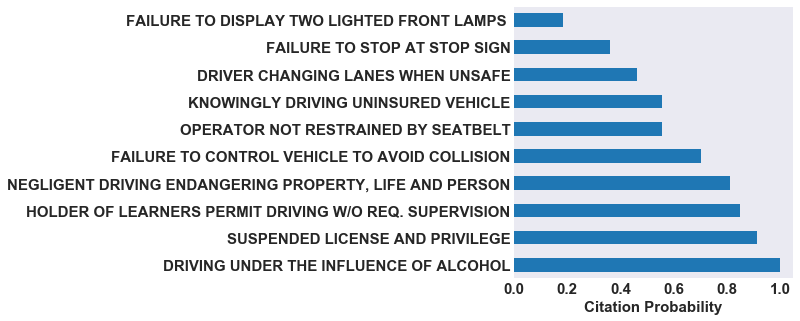

In [33]:
plt.style.use('seaborn-dark')

random_driver = df_X1.iloc[777777, :]

some_violations = np.array(['DRIVING UNDER THE INFLUENCE OF ALCOHOL',
                            'SUSPENDED LICENSE AND PRIVILEGE',
                            'FAILURE TO CONTROL VEHICLE TO AVOID COLLISION',
                            'HOLDER OF LEARNERS PERMIT DRIVING W/O REQ. SUPERVISION',
                            'NEGLIGENT DRIVING ENDANGERING PROPERTY, LIFE AND PERSON',
                            'OPERATOR NOT RESTRAINED BY SEATBELT',
                            'KNOWINGLY DRIVING UNINSURED VEHICLE',
                            'DRIVER CHANGING LANES WHEN UNSAFE',
                            'FAILURE TO STOP AT STOP SIGN',
                            'FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS '
                             ])

vec_array = vectorizer.transform(some_violations).toarray()

driver = len(some_violations)*[random_driver]
driver = np.vstack(driver)

driver[:,20:83] = vec_array

random_forest = load('RANDOM_FOREST.joblib')
prob = random_forest.predict_proba(driver)[:,0]



df_prob = pd.DataFrame(data = prob, index = some_violations, columns=['Prob'])
df_prob.sort_values(by = 'Prob', ascending = False, inplace = True)
ax = df_prob.plot(kind = 'barh', rot = 0, legend = False, figsize = (5,5))
plt.xlabel('Citation Probability', fontsize = 15, fontweight = 'bold')


for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
    tick.label1.set_fontweight('bold')

plt.savefig('prob.png', dpi = 100, bbox_inches = 'tight')
